In [1]:
%load_ext autoreload

# Reading libraries....
import ASMElib
import importlib

from ASMElib import * 
importlib.reload(ASMElib)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 재료:  SS316H (ASME에는 TP316H라 표시됨. SS316과는 다름)
#Pm: the general primary memberane stress 

In [2]:
Pm = float(input("Pm 값을 입력하세요. 단위 (MPa): "))
PL = float(input("PL 값을 입력하세요. 단위 (MPa): "))
Pb = float(input("Pb 값을 입력하세요. 단위 (MPa): "))

Pm 값을 입력하세요. 단위 (MPa): 50
PL 값을 입력하세요. 단위 (MPa): 60
Pb 값을 입력하세요. 단위 (MPa): 70


In [2]:
# Test Case (Given)
Pm = 50 
PL = 60 
Pb = 60

# Design Limit 

In [3]:
# 판단 기준
# [입력값] Pm, PL, Pb
# [설계 조건]  
# Pm (<=) So 
# PL+Pb (<=) 1.5 * So

# [1단계] So 결정하기
# So: the maximum allowable value of general primary membrane stress intensity 
# (참고)So 결정할 때, 저온의 경우 Smt까지 고려해서 결정해야함. (56page)

So=determine_So("./data/TP316H_So.csv")
print(f"테이블에서 읽은 So 값: {So:.2f} MPa")


# [2단계] 설계점 평가 

if(Pm <= So):
    print("Design Limit Condition (a) is passed.")
else:
    print("Design Limit Condition (a) is failed.")
    
# (b) (Pl+Pb) <= 1.5 *So 
if( (PL+Pb) <= 1.5 *So ):
    print("Design Limit Condition (b) is passed.")
else:
    print("Design Limit Condition (b) is failed.")

   CaseNumber        Temperature
0          33         Smls. tube
1          34         Smls. tube
2          37          Wld. tube
3          38          Wld. tube
4          39          Wld. tube
5          40          Wld. tube
6          41  Smls. & wld. pipe
7          42  Smls. & wld. pipe
8          43          Wld. tube
9          44          Wld. tube
Case Number를 입력하세요 (예: 33~44): 33
온도를 입력하세요 [ xx °C] (예: 350.0  °C): 350
테이블에서 읽은 So 값: 114.00 MPa
Design Limit Condition (a) is passed.
Design Limit Condition (b) is passed.


# Level A and Level B Service Limit

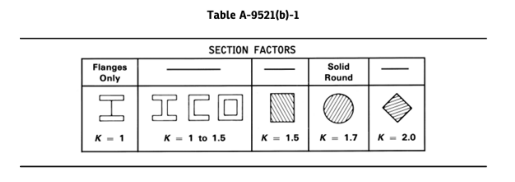

섹션 형상에 맞는 K값을 입력하세요. (참고: Shell-Type 구조의 벽면 Stress를 평가하는 경우 K=1.5를 입력)
1.5
The value of K is  1.5
The value of Kt is  1.25
   Temperature [°C]  Time [h]
0             550.0        40
1             600.0        20


In [4]:

# 판단 기준
# [입력값] Pm, PL, Pb
# [설계 조건]  
# Pm (<=) Smt 
# PL+Pb (<=) K * Sm 
# PL+Pb/Kt (<=) St

# K: the section factor for the cross section 
# Kt: accounts for the reduction in extream fiber bending stress due to the effect of creep 

# K is given by section shape, and Kt = (K+1)/2

K,Kt=determine_K_and_Kt()
print("The value of K is ", K)
print("The value of Kt is ", Kt)


# 사용자로부터 시간, 히스토리를 입력받아야함. 
# [User INPUT- OCT]
# [시작온도, 끝 온도, time 구간]

segments = [
    (500, 600, 30),  # 기울기형 구간
    (600, 600, 20),  # 계단형 구간
    (600, 500, 10)
]

Tt_ListForSmt =extract_Tt_list_for_Smt(segments, mode="mid")

print(Tt_ListForSmt)




In [5]:

'''
img = mpimg.imread('./images/SmReductionRatio.png')
plt.imshow(img)
plt.axis('off')  # 축 없애기
plt.show()

print("섹션 형상에 맞는 K값을 입력하세요. (참고: Shell-Type 구조의 벽면 Stress를 평가하는 경우 K=1.5를 입력)")

K= float(input())
Kt= (K+1.0)/2.0

print("The value of K is ", K)
print("The value of Kt is ", Kt)
'''


Design Limit Condition (a) is passed.
Design Limit Condition (b) is passed.


# Level A Limit 
## Based on Linearly Elastic Material Model Analysis

In [ ]:
def determine_Smt(filename):
    # CSV 파일 읽기
    df = pd.read_csv(filename)
    # 처음 두 열 보여주기
    print(df.iloc[:, :2])  
    # 온도 값: 열 이름에서 앞의 두 개 제외
    temperatureValues = df.columns[2:].astype(float).to_numpy()
    # 열 이름 재지정
    df = df.rename(columns={df.columns[0]: 'Case', df.columns[1]: 'Label'})
    # 사용자 입력: Case Number
    case = int(input("Case Number를 입력하세요 (예: 33~44): "))   
    # 해당 케이스 행 찾기
    matched_row = df[df['Case'] == case]
    if matched_row.empty:
        print(f"Error: Case {case} not found.")
        return None
    # stress 값만 추출 (앞 2열 제외)
    SoValues = matched_row.iloc[0, 2:].to_numpy(dtype=float)
    # 사용자 입력: Target Temperature
    targetT = float(input("온도를 입력하세요 [ xx °C] (예: 350.0  °C): "))
    # 선형 보간 수행
    So = np.interp(targetT, temperatureValues, SoValues)
    return So